There are two retail stores - store1 and store2 , both having same size and company , but store 2 is not performing good and 
its conversion ratio is continously decreasing . Find the insights related to that

In [ ]:
import pandas as pd

In [19]:
#reading store 1 data
df=pd.read_excel("store1.xlsx")

In [20]:
df

,NAME OF CUSTOMER,BILL VALUE,FMCG/STAPLES,APPAREL/E&E,OTHERS,PRIVATE LBL,VALUE,CATCHMENT
0,GBBEWTHG,400,400,0,0,0,0,3
1,RTHFNFUY,450,0,450,0,1,450,2
2,NHSDMHL,140,90,0,50,0,0,4
3,TGUUGU,1605,390,900,315,1,1000,1
4,DJKFIL,1425,350,950,125,1,950,3
...,...,...,...,...,...,...,...,...
195,ERFFG,800,100,700,0,1,650,1
196,RRRGERG,80,23,0,57,0,0,4
197,GRVTTBB,400,180,0,220,0,0,4
198,IREGN,1740,400,1300,40,1,900,1


In [21]:
#checking null values
df.isnull().sum()

NAME OF CUSTOMER    0
BILL VALUE          0
FMCG/STAPLES        0
APPAREL/E&E         0
OTHERS              0
PRIVATE LBL         0
VALUE               0
CATCHMENT           0
dtype: int64

In [123]:
#total number of duplicated values
df.duplicated().sum()

67

In [62]:
#Dropping duplicate values
df2=df.drop_duplicates()

In [63]:
df2

,NAME OF CUSTOMER,BILL VALUE,FMCG/STAPLES,APPAREL/E&E,OTHERS,PRIVATE LBL,VALUE,CATCHMENT
0,GBBEWTHG,400,400,0,0,0,0,3
1,RTHFNFUY,450,0,450,0,1,450,2
2,NHSDMHL,140,90,0,50,0,0,4
3,TGUUGU,1605,390,900,315,1,1000,1
4,DJKFIL,1425,350,950,125,1,950,3
...,...,...,...,...,...,...,...,...
187,KHGYPT,510,400,0,110,0,0,2
189,SSRTA,720,390,0,330,0,0,2
192,GGBBRTB,150,150,0,0,0,0,4
198,IREGN,1740,400,1300,40,1,900,1


In [137]:
sum(df2["BILL VALUE"])

92355

In [64]:
# checking if total bill values is equal to sum of all categories for store 1
df2[df2["BILL VALUE"] != (df2["FMCG/STAPLES"] +df2["APPAREL/E&E"] + df2["OTHERS"])]

,NAME OF CUSTOMER,BILL VALUE,FMCG/STAPLES,APPAREL/E&E,OTHERS,PRIVATE LBL,VALUE,CATCHMENT
26,ERGREGER,1005,200,1600,205,1,1250,1
98,EGTEW,700,200,700,0,1,700,2
111,ERGREGER,1005,200,1600,205,1,1005,1


In [124]:
# checking if total bill values is equal to sum of all categories for store 2
dfstore21[dfstore21["BILL VALUE"] != (dfstore21["FMCG/STAPLES"] +dfstore21["APPAREL/E&E"] + dfstore21["OTHERS"])]

,NAME OF CUSTOMER,BILL VALUE,FMCG/STAPLES,APPAREL/E&E,OTHERS,PRIVATE LBL,VALUE,CATCHMENT,total sales
147,ERGGER,100,650,0,50,1,170,2,700


In [65]:
#creating new column of total sales
df2["total sales"]=(df2["FMCG/STAPLES"] +df2["APPAREL/E&E"] + df2["OTHERS"])

C:\Users\hp\AppData\Local\Temp\ipykernel_16424\1480426292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["total sales"]=(df2["FMCG/STAPLES"] +df2["APPAREL/E&E"] + df2["OTHERS"])


In [66]:
df2

,NAME OF CUSTOMER,BILL VALUE,FMCG/STAPLES,APPAREL/E&E,OTHERS,PRIVATE LBL,VALUE,CATCHMENT,total sales
0,GBBEWTHG,400,400,0,0,0,0,3,400
1,RTHFNFUY,450,0,450,0,1,450,2,450
2,NHSDMHL,140,90,0,50,0,0,4,140
3,TGUUGU,1605,390,900,315,1,1000,1,1605
4,DJKFIL,1425,350,950,125,1,950,3,1425
...,...,...,...,...,...,...,...,...,...
187,KHGYPT,510,400,0,110,0,0,2,510
189,SSRTA,720,390,0,330,0,0,2,720
192,GGBBRTB,150,150,0,0,0,0,4,150
198,IREGN,1740,400,1300,40,1,900,1,1740


In [67]:
df2["total sales"].max()

2150

In [68]:
list(df2.columns)

['NAME OF CUSTOMER',
 'BILL VALUE',
 'FMCG/STAPLES',
 'APPAREL/E&E',
 'OTHERS',
 'PRIVATE LBL',
 'VALUE',
 'CATCHMENT ',
 'total sales']

In [70]:

import seaborn as sns

<AxesSubplot:xlabel='CATCHMENT ', ylabel='total sales'>

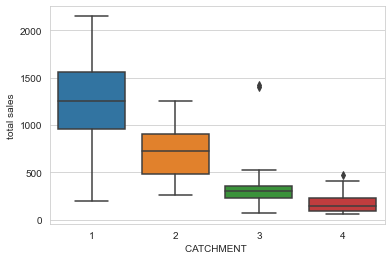

In [71]:
#boxplot to understand sales pattern
sns.set_style("whitegrid")
  
sns.boxplot(x ="CATCHMENT ", y="total sales", data = df2)

In [ ]:
# it can be seen that catchment 4 have smaller basket size(amount wise) and cathcment 1 have larger

In [143]:
#checking number of customers catchment wise for store 1
df2.groupby(['CATCHMENT ']).count()

,NAME OF CUSTOMER,BILL VALUE,FMCG/STAPLES,APPAREL/E&E,OTHERS,PRIVATE LBL,VALUE,total sales
CATCHMENT,,,,,,,,
1,46,46,46,46,46,46,46,46
2,31,31,31,31,31,31,31,31
3,27,27,27,27,27,27,27,27
4,29,29,29,29,29,29,29,29


In [72]:
#analysing the sales of cathcment 4 of store 1
# it can be seen that none of them purchased any private label product
# it can be seen that one a few purchased apparel product
# most of the sales is from fmcg anf others
df2[df2["CATCHMENT "]==4]

,NAME OF CUSTOMER,BILL VALUE,FMCG/STAPLES,APPAREL/E&E,OTHERS,PRIVATE LBL,VALUE,CATCHMENT,total sales
2,NHSDMHL,140,90,0,50,0,0,4,140
7,DVERG,80,0,80,0,0,0,4,80
8,RREGT,60,50,0,10,0,0,4,60
10,TRGEGEG,205,0,0,205,0,0,4,205
11,WEETRETG,475,200,0,275,0,0,4,475
21,CDWGJTNB,300,186,0,114,0,0,4,300
22,RBTJYRN,90,0,0,90,0,0,4,90
25,RGERGERG,105,0,0,105,0,0,4,105
35,BTTRRB,95,10,0,85,0,0,4,95
36,GGBBRTB,95,95,0,0,0,0,4,95


In [73]:
df2[df2["CATCHMENT "]==1]

,NAME OF CUSTOMER,BILL VALUE,FMCG/STAPLES,APPAREL/E&E,OTHERS,PRIVATE LBL,VALUE,CATCHMENT,total sales
3,TGUUGU,1605,390,900,315,1,1000,1,1605
6,RGGGT,1305,300,1000,5,1,800,1,1305
9,FGHHG,1260,900,200,160,0,0,1,1260
12,WWFGGRR,900,100,800,0,1,800,1,900
13,RRGRS,1605,600,800,205,1,600,1,1605
16,DSFEWF,1060,550,300,210,0,0,1,1060
19,RRGERG,192,0,0,192,0,0,1,192
24,RGRGRG,1605,350,1000,255,1,750,1,1605
26,ERGREGER,1005,200,1600,205,1,1250,1,2005
28,DDFFSSD,900,0,900,0,1,750,1,900


In [74]:
dfstore2=pd.read_excel("store2.xlsx")

In [75]:
dfstore2

,NAME OF CUSTOMER,BILL VALUE,FMCG/STAPLES,APPAREL/E&E,OTHERS,PRIVATE LBL,VALUE,CATCHMENT
0,NMNMUM,740,0,300,440,0,0,3
1,DFFSG,425,425,0,0,1,105,1
2,RRGERG,1350,100,1000,250,1,560,4
3,SESTSGG,105,105,0,0,1,105,1
4,EWEDDD,900,100,800,0,0,0,3
...,...,...,...,...,...,...,...,...
195,RGGGT,448,350,0,98,1,150,2
196,EEWFWE,588,0,500,88,0,0,3
197,RGERGERG,202,160,0,42,0,0,1
198,FGDHSK,123,123,0,0,0,0,1


In [76]:
dfstore2.isnull().sum()

NAME OF CUSTOMER    0
BILL VALUE          0
FMCG/STAPLES        0
APPAREL/E&E         0
OTHERS              0
PRIVATE LBL         0
VALUE               0
CATCHMENT           0
dtype: int64

In [77]:
dfstore2.duplicated().sum()

69

In [78]:
dfstore21=dfstore2.drop_duplicates()

In [82]:
dfstore21

,NAME OF CUSTOMER,BILL VALUE,FMCG/STAPLES,APPAREL/E&E,OTHERS,PRIVATE LBL,VALUE,CATCHMENT
0,NMNMUM,740,0,300,440,0,0,3
1,DFFSG,425,425,0,0,1,105,1
2,RRGERG,1350,100,1000,250,1,560,4
3,SESTSGG,105,105,0,0,1,105,1
4,EWEDDD,900,100,800,0,0,0,3
...,...,...,...,...,...,...,...,...
193,MKJHG,755,350,0,405,1,150,3
194,BVNCH,604,550,0,54,1,320,2
196,EEWFWE,588,0,500,88,0,0,3
198,FGDHSK,123,123,0,0,0,0,1


In [83]:
dfstore21[dfstore21["BILL VALUE"] != (dfstore21["FMCG/STAPLES"] +dfstore21["APPAREL/E&E"] + dfstore21["OTHERS"])]

,NAME OF CUSTOMER,BILL VALUE,FMCG/STAPLES,APPAREL/E&E,OTHERS,PRIVATE LBL,VALUE,CATCHMENT
147,ERGGER,100,650,0,50,1,170,2


In [84]:
dfstore21["total sales"]=(dfstore21["FMCG/STAPLES"] +dfstore21["APPAREL/E&E"] + dfstore21["OTHERS"])

C:\Users\hp\AppData\Local\Temp\ipykernel_16424\688870127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstore21["total sales"]=(dfstore21["FMCG/STAPLES"] +dfstore21["APPAREL/E&E"] + dfstore21["OTHERS"])


In [85]:
dfstore21

,NAME OF CUSTOMER,BILL VALUE,FMCG/STAPLES,APPAREL/E&E,OTHERS,PRIVATE LBL,VALUE,CATCHMENT,total sales
0,NMNMUM,740,0,300,440,0,0,3,740
1,DFFSG,425,425,0,0,1,105,1,425
2,RRGERG,1350,100,1000,250,1,560,4,1350
3,SESTSGG,105,105,0,0,1,105,1,105
4,EWEDDD,900,100,800,0,0,0,3,900
...,...,...,...,...,...,...,...,...,...
193,MKJHG,755,350,0,405,1,150,3,755
194,BVNCH,604,550,0,54,1,320,2,604
196,EEWFWE,588,0,500,88,0,0,3,588
198,FGDHSK,123,123,0,0,0,0,1,123


In [86]:
list(dfstore21.columns)

['NAME OF CUSTOMER',
 'BILL VALUE',
 'FMCG/STAPLES',
 'APPAREL/E&E',
 'OTHERS',
 'PRIVATE LBL',
 'VALUE',
 'CATCHMENT',
 'total sales']

<AxesSubplot:xlabel='CATCHMENT', ylabel='total sales'>

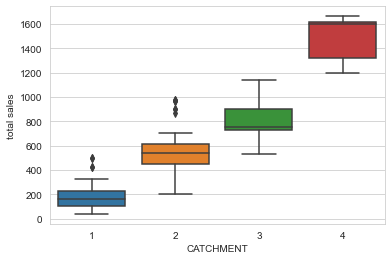

In [87]:
sns.set_style("whitegrid")
  
sns.boxplot(x ="CATCHMENT", y="total sales", data = dfstore2)

In [88]:
df2.groupby(['CATCHMENT ']).sum()

,BILL VALUE,FMCG/STAPLES,APPAREL/E&E,OTHERS,PRIVATE LBL,VALUE,total sales
CATCHMENT,,,,,,,
1,55432,11774,36650,9008,36,29850,57432
2,21522,9992,7760,3970,9,4960,21722
3,10181,4299,2570,3312,2,1900,10181
4,5220,2223,80,2917,0,0,5220


In [89]:
dfstore21.groupby(['CATCHMENT']).sum()

,BILL VALUE,FMCG/STAPLES,APPAREL/E&E,OTHERS,PRIVATE LBL,VALUE,total sales
CATCHMENT,,,,,,,
1,9436,8100,630,706,12,2145,9436
2,23565,16837,4458,2870,32,10012,24165
3,21279,5409,12279,3591,12,3430,21279
4,10328,550,8150,1628,2,1120,10328


In [90]:
dfstore21[dfstore21["CATCHMENT"]==4]

,NAME OF CUSTOMER,BILL VALUE,FMCG/STAPLES,APPAREL/E&E,OTHERS,PRIVATE LBL,VALUE,CATCHMENT,total sales
2,RRGERG,1350,100,1000,250,1,560,4,1350
8,EIJHDHHDN,1664,0,1500,164,0,0,4,1664
90,FGHHG,1600,100,1400,100,0,0,4,1600
93,RRGERG,1600,150,850,600,0,0,4,1600
120,RRGERG,1250,100,900,250,1,560,4,1250
126,JHDKLS,1664,0,1500,164,0,0,4,1664
142,FGHHG,1200,100,1000,100,0,0,4,1200


In [122]:
dfstore21[dfstore21["CATCHMENT"]==1]

,NAME OF CUSTOMER,BILL VALUE,FMCG/STAPLES,APPAREL/E&E,OTHERS,PRIVATE LBL,VALUE,CATCHMENT,total sales
1,DFFSG,425,425,0,0,1,105,1,425
3,SESTSGG,105,105,0,0,1,105,1,105
6,RREGT,40,40,0,0,0,0,1,40
7,TRGEGEG,55,55,0,0,0,0,1,55
9,WEETRETG,300,240,0,60,0,0,1,300
10,WWFGGRR,501,400,0,101,1,100,1,501
11,RRGRS,108,108,0,0,0,0,1,108
14,WERFWRTFG,75,75,0,0,0,0,1,75
15,EICHIENN,120,120,0,0,0,0,1,120
17,GHFDSL,300,300,0,0,1,300,1,300


,NAME OF CUSTOMER,BILL VALUE,FMCG/STAPLES,APPAREL/E&E,OTHERS,PRIVATE LBL,VALUE,total sales
CATCHMENT,,,,,,,,
1,46,46,46,46,46,46,46,46
2,31,31,31,31,31,31,31,31
3,27,27,27,27,27,27,27,27
4,29,29,29,29,29,29,29,29


In [92]:
# percentage contribution of cathcment4
29/(46+31+27+29)*100

21.804511278195488

In [93]:
#checking number of customers catchment wise for store 2
dfstore21.groupby(['CATCHMENT']).count()

,NAME OF CUSTOMER,BILL VALUE,FMCG/STAPLES,APPAREL/E&E,OTHERS,PRIVATE LBL,VALUE,total sales
CATCHMENT,,,,,,,,
1,54,54,54,54,54,54,54,54
2,43,43,43,43,43,43,43,43
3,27,27,27,27,27,27,27,27
4,7,7,7,7,7,7,7,7


In [94]:
7/(54+43+27+7)*100

5.343511450381679

In [95]:
dfstore21[dfstore21["CATCHMENT"]==1]

,NAME OF CUSTOMER,BILL VALUE,FMCG/STAPLES,APPAREL/E&E,OTHERS,PRIVATE LBL,VALUE,CATCHMENT,total sales
1,DFFSG,425,425,0,0,1,105,1,425
3,SESTSGG,105,105,0,0,1,105,1,105
6,RREGT,40,40,0,0,0,0,1,40
7,TRGEGEG,55,55,0,0,0,0,1,55
9,WEETRETG,300,240,0,60,0,0,1,300
10,WWFGGRR,501,400,0,101,1,100,1,501
11,RRGRS,108,108,0,0,0,0,1,108
14,WERFWRTFG,75,75,0,0,0,0,1,75
15,EICHIENN,120,120,0,0,0,0,1,120
17,GHFDSL,300,300,0,0,1,300,1,300


In [121]:
#analyse bundling of products
dfstore21[(dfstore21["FMCG/STAPLES"] > 0)  & (dfstore21["APPAREL/E&E"]> 0) & (dfstore21["OTHERS"]== 0)].count()

NAME OF CUSTOMER    1
BILL VALUE          1
FMCG/STAPLES        1
APPAREL/E&E         1
OTHERS              1
PRIVATE LBL         1
VALUE               1
CATCHMENT           1
total sales         1
dtype: int64

In [119]:
dfstore21[(dfstore21["FMCG/STAPLES"] > 0)  & (dfstore21["OTHERS"]> 0)].count()

NAME OF CUSTOMER    58
BILL VALUE          58
FMCG/STAPLES        58
APPAREL/E&E         58
OTHERS              58
PRIVATE LBL         58
VALUE               58
CATCHMENT           58
total sales         58
dtype: int64

In [120]:
dfstore21[(dfstore21["APPAREL/E&E"] > 0)  & (dfstore21["OTHERS"]> 0)].count()

NAME OF CUSTOMER    17
BILL VALUE          17
FMCG/STAPLES        17
APPAREL/E&E         17
OTHERS              17
PRIVATE LBL         17
VALUE               17
CATCHMENT           17
total sales         17
dtype: int64

# analyse bundling for store1

In [115]:
df2[(df2["APPAREL/E&E"] > 0)  & (df2["OTHERS"]> 0)].count()

NAME OF CUSTOMER    46
BILL VALUE          46
FMCG/STAPLES        46
APPAREL/E&E         46
OTHERS              46
PRIVATE LBL         46
VALUE               46
CATCHMENT           46
total sales         46
dtype: int64

In [114]:
df2[(df2["APPAREL/E&E"] > 0)  & (df2["FMCG/STAPLES"]> 0)].count()

NAME OF CUSTOMER    55
BILL VALUE          55
FMCG/STAPLES        55
APPAREL/E&E         55
OTHERS              55
PRIVATE LBL         55
VALUE               55
CATCHMENT           55
total sales         55
dtype: int64

In [116]:
df2[(df2["OTHERS"] > 0)  & (df2["FMCG/STAPLES"]> 0)].count()

NAME OF CUSTOMER    76
BILL VALUE          76
FMCG/STAPLES        76
APPAREL/E&E         76
OTHERS              76
PRIVATE LBL         76
VALUE               76
CATCHMENT           76
total sales         76
dtype: int64